In [1]:
import numpy as np
import pandas as pd
from pytrie import StringTrie 
import random
import matplotlib.pyplot as plt

In [2]:
#initialising variables 
nreal=10;
l_iniA=15; #initial length of monomer of type A
l_iniB=20; #initial length of monomer of type B
concA=10;  #Conc of type A 
concB=10;  #Conc of type B
tsteps=510; # total number of time steps
maxspecies=2;
totalspecies=2**(maxspecies+1);#keeping a limit on this
distri=np.array(([0],[]))# how the species are formed 
for i in range(maxspecies):
    distri=np.concatenate((distri,distri))
x=np.zeros(totalspecies);   #concentration of the whole distribution at a particular time 
    
y=np.zeros([totalspecies,tsteps])#concentration of the whole distribution at all time(maxspecies,tsteps)    

tobsmax=100; #Maximum observation time (give a safe value)
timebins=500; #number of bins into which the observation time is divided
limit=100
dt=tobsmax/timebins;
a=np.zeros(tsteps);
t=np.zeros(tsteps);
# entropy=zeros(tsteps,1);

# entropy_th=zeros(tsteps,1);
# totconc=zeros(tsteps+1,1);
# totconc_th=zeros(tsteps+1,1);
z=np.concatenate((distri,distri))
distri

array([list([0]), list([]), list([0]), list([]), list([0]), list([]),
       list([0]), list([])], dtype=object)

In [25]:
def remove0(d):
    a=[]
    b={}
    x= [ v for v in d.values() ]
    y= [ v for v in d.keys() ]
    for i in range(len(y)):
        if(x[i]!=0):
            a.append(i);
    for i in a:
        b[y[i]]=x[i]
    
    return b;

dict2={'a':4,'b':9,'v':10,'d':0,'':234}
remove0(dict2)

{'a': 4, 'b': 9, 'v': 10, '': 234}

In [35]:
a1=""
b1=""
c1=""

dict1={}
xa=1
xb=1
xc=2
concA=500
concB=500
concC=500
for i in range(xa):
    a1+="a"; 
for i in range(xb):
    b1+="b";
for i in range(int(xc/2)):
    c1+="a";
for i in range(int(xc/2)):
    c1+="b"; 
#print(concA)
print(concA*xa+concB*xb+concC*xc)
# dict1[a]=concA
# dict1[b]=concB
# dict1[c]=concC
print(dict1)
#dict1[(a+b)[:int((concA+concB))]]=concA+concB
#dict1[(a+a)]=concA+concB

lambd=1;
nreal=1
tsteps=1500
concentration=np.zeros((tsteps,4))
concentrationf=np.zeros((tsteps+1,4))
temp1=0
entropy=np.zeros((tsteps+1))
for p in range(nreal):
    concentration=np.zeros((tsteps+1,4))
    temp1=0
    t=np.zeros(tsteps+1);
    dict1={}
    dict1[a1]=concA
    dict1[b1]=concB
    dict1[c1]=concC
    print(dict1)
    for i in range(tsteps):
        #print(i)
        dict1=remove0(dict1)
        maxlength=len(dict1)
        #print(dict1)
        jmax1 = int((maxlength-1)*maxlength/2); #No. of forward reactions
        jmax2=jmax1;  #o. of backward reactions
        jmaxtot=jmax1+jmax2;
        jmaxtot=jmax1
        a=np.zeros(jmaxtot); 

        c=np.zeros(jmaxtot)

        c[1:jmax1]=2*lambd;
        c[jmax1+1:jmaxtot]=2;
        x= [ v for v in dict1.values() ]
        y= [ v for v in dict1.keys() ]
        j=0    
        #print(maxlength)
        for l in range(1,maxlength):
            for k in range(l-1):
                j=j+1;
                #print(j)
                if (k==(l-k)):
                    yt=c[j]
                    a[j]=0.5*c[j]*(x[k]-1)*x[l-k]
                    #print(1)
                else:
                    yt=x[l-k]
                    a[j]=0.5*c[j]*x[k]*x[l-k]#orward reactions (factor of 0.5 to remove double counting)
                    #print(1)
                #a[j+jmax1]=0.5*c[j+jmax1]*x[l]; #or corresponding backward reactions

        a0=sum(a);
        #print(a)

            # r1 and r2 are two random nos. in [0,1]
        r1=random.random(); r2=random.random(); ajsum=0;

        tau = (1/a0)*np.log(1/r1);
        #print(tau)
        ajsum=0;

        for j in range(1,jmaxtot):
            if (ajsum<=r2*a0):
                ajsum=ajsum+a[j];
                jmin=j;

        #print(jmin)   


        t[i+1]=t[i]+tau;


        j=0;

        # Increments in no. of molecules of the species that appear in
        # jmin^{th} reaction


        #print(jmin)
        for l in range(1,maxlength):
            for k in range(l-1):
                j=j+1;
                #print(jmin)
                pp=2
                ll=int(len(y[k])/pp)+1
                if (j==jmin  and y[k]!=y[l-k]):

                    dict1[y[k]]=x[k]-1
                    dict1[y[l-k]]=x[l-k]-1;
                    if(y[k]+y[l-k] in dict1):
                        temp=y.index(y[k]+y[l-k])
                        
                        dict1[y[k]+y[l-k]]=x[temp]+1;
                    else:
                        dict1[y[k]+y[l-k]]=1;
                    x= [ v for v in dict1.values() ]
                    y= [ v for v in dict1.keys() ]    
#multiplicative additve reaction                  
#                     if(y[l-k][:ll]+y[k] in dict1):
#                         temp=y.index(y[l-k][:ll]+y[k])
#                         dict1[y[l-k][:ll]+y[k]]=x[temp]+1;
#                     else:
#                         dict1[y[l-k][:ll]+y[k]]=1
                    
                    
#                     if(y[l-k][ll:] in dict1):
#                         temp=y.index(y[l-k][ll:])
#                         dict1[y[l-k][ll:]]=x[temp]+1;
#                     else:
#                         dict1[y[l-k][ll:]]=1

                elif(jmax1+j==jmin):
                    dict1[y[l]]=x[l]-1;
                    first=y[k][int(maxlength/4):]
                    sec=y[k][:int(maxlength/4)]

                    if(first in dict1):
                        temp=y.index(first)
                        dict1[first]=x[temp]+1;
                    else:
                        dict1[first]=1

                    x= [ v for v in dict1.values() ]
                    y= [ v for v in dict1.keys() ]

                    if sec in dict1:
                        temp=y.index(sec)
                        dict1[sec]=x[temp]+1;
                    else:
                        dict1[sec]=1
        if(a1 in dict1):
            concentration[temp1][0]=dict1[a1]
        if(b1 in dict1):
            concentration[temp1][1]=dict1[b1]
        if(c1 in dict1):
            concentration[temp1][2]=dict1[c1]
        if('abb' in dict1):
            concentration[temp1][3]=dict1['abb']
        sum1= sum([ v for v in dict1.values() ])
        entropy[temp1]=sum1*np.log(sum1)
        temp1+=1
    concentration=np.array(concentration)/sum(concentration)
    
    concentrationf=concentrationf+concentration
concentrationf=concentrationf/nreal
concentrationf=np.array(concentrationf)


print(dict1)

2000
{}
{'a': 500, 'b': 500, 'ab': 500}
{'a': 21, 'b': 31, 'ababbababaab': 1, 'babaababababbaababaabababbbab': 1, 'bbabaabababaab': 1, 'abbaaababbabbbabaaab': 1, 'aabbabbaaaabaabaaaabaaab': 1, 'babaabababbab': 1, 'aaabaabbababaabababaabababbababab': 1, 'bbababaababababaabab': 1, 'ababaabbabababbaabaabbababaab': 1, 'bbabab': 1, 'abaaaababab': 1, 'baaababaabbabbaabbbbbabaab': 1, 'abbababbabbababab': 1, 'baaabbabbaab': 1, 'bbbbbabaaab': 1, 'bbabbbbaaaabbabababbbab': 1, 'babaabaabaaabbabbbaababbab': 1, 'aaaababbaab': 1, 'babababaababaab': 1, 'aababaabbababaab': 1, 'aababaaaabbabbbabaabababbababbbbbababaaaabababaababbabaab': 1, 'aabaabbaababababababbabbbaab': 1, 'baabbabaaababbababbababaabbabaabaaabbaaab': 1, 'abbababbbababababbaabbbab': 1, 'aaaabababbbabaaabaabbabbbabab': 1, 'abaabbabab': 1, 'abbaaabaabbabbabbababbbaabaabbab': 1, 'aaaabaababaaaabbabbaababbaaabababbababbbababbab': 1, 'bababbaabaabaaabbaaababab': 1, 'baaaababbbbabbab': 1, 'aaaabababaababbaabaababababbababbaab': 1, 'aabaabaab

C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in true_divide


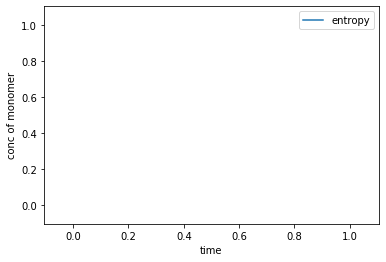

[nan nan nan ... nan nan nan]


In [36]:
#concentration plots of the polymers
entropy=np.sum(concentrationf,axis=1)*np.log(np.sum(concentrationf,axis=1))
# y1=concentrationf[:(t.shape[0]-3),0]/np.sum(concentrationf[:(t.shape[0]-3),0])
# y2=concentrationf[:(t.shape[0]-3),1]/np.sum(concentrationf[:(t.shape[0]-3),1])
# y3=concentrationf[:(t.shape[0]-3),2]/np.sum(concentrationf[:(t.shape[0]-3),2])
# y4=concentrationf[:(t.shape[0]-3),3]/np.sum(concentrationf[:(t.shape[0]-3),3])
y1=concentrationf[:(t.shape[0]-3),0]
y2=concentrationf[:(t.shape[0]-3),1]
y3=concentrationf[:(t.shape[0]-3),2]
y4=concentrationf[:(t.shape[0]-3),3]
en=entropy[:(t.shape[0]-3)]
plt.plot(t[:(t.shape[0]-3)],en,label='entropy')
#plt.plot(t[:(t.shape[0]-3)],y1,label='a')
#plt.plot(t[:(t.shape[0]-3)],y2,label='b')
#plt.plot(t[:(t.shape[0]-3)],y3,label='ab')
#plt.plot(t[:(t.shape[0]-3)],y4,label='abb')
plt.plot()
#plt.plot(concentrationf[2],t)
#plt.plot(concentrationf[3],t)
plt.xlabel('time')
plt.ylabel('conc of monomer')
#plt.title('')
plt.legend()
plt.show()

print(entropy)

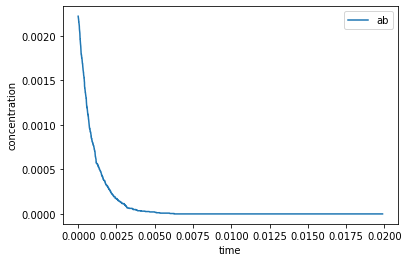

In [37]:
#plots of ab and abb
plt.plot(t[:(t.shape[0]-3)],y3,label=c1)
#plt.plot(t[:(t.shape[0]-3)],y4,label='abb')
#plt.plot(t[:(t.shape[0]-3)],y4,label='abb')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

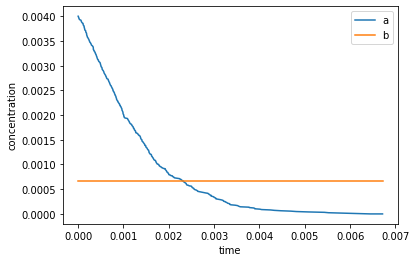

In [34]:
#plots of a and b
plt.plot(t[:(t.shape[0]-3)],y1,label=a1)
plt.plot(t[:(t.shape[0]-3)],y2,label=b1)
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

In [30]:
#plot of longest polymers formed
import operator

sorted_dict = sorted(dict1.items(), key=operator.itemgetter(1))
sorted_dict.reverse()
topn=10
xval = np.empty(topn, dtype=object)
yval = np.empty(topn, dtype=object)
#sorted_dict[2]=['ab',19]
for i in range(topn):
    xval[i]=sorted_dict[i][0]
    yval[i]=sorted_dict[i][1]


def plot_bar_x(label,no_movies):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_movies)
    
    plt.xlabel('polymer', fontsize=15)
    plt.ylabel('concentration at equilibrium', fontsize=15)
    plt.xticks(index, label, fontsize=7, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()
plot_bar_x(xval,yval)
print(sorted_dict)

IndexError: list index out of range

In [12]:
a=[]
b=[]
j=0
a= [ v for v in dict1.keys() ]
b=[ v for v in dict1.values() ]
sum1=0
length=len(a)
#a=[None]*length
for i in range(length):
    
    sum1+=(len(a[i])*b[i])
sum1,print(b)

[253, 1905, 1221, 437]


(5474, None)

In [13]:
#computing a
# x(time,species) --> matrix x
# c(channel) --> vector c
# tsteps=no. of random time steps (or no. of reactions)
# a(j) = propensity function for jth reaction channel
# a0 =  sum of a(j)
# r1,r2 = two uniform random nos. in [0,1]
# ajsum = sum of a(j) till the sum exceeds r2*a0
# jmin = mininum value of j for which ajsum exceeds r2*a0
# tau = random time step
#rate constant

def no_tillnow(x):
    k=0
    for i in x:
        k+=1
        if(i==0):
            return k-1
    return 'full'        

def compute_a(maxspecies,x,c):
    a=np.zeros(totalspecies) 
    k=0
    length=no_tillnow(x)
    for l in range(2,length):
        for k in range(1,l-1):
            j=j+1
            if(k==l-k):
                a[j]=0.5*c[j]*(x[k]-1)*x[l-k];
            else:
                a[j]=0.5*c[j]*x[k]*x[l-k];#Forward reactions (factor of 0.5 to remove double counting)
    return a,length;       

def calcparameters(a,t):
    a0=sum(a);        
    r1=random.random()
    r2=random.random()
    # r1 and r2 are two random nos. in [0,1]
    ajsum=0

    tau = (1/a0)*log(1/r1);

    ajsum=0;
    tau

    for j in range(1,jmaxtot+1):
        if ajsum<=r2*a0:
            ajsum=ajsum+a(j);
            jmin=j;
    t[i+1]=t[i]+tau;       
    return a,jmin,t;
            
        
        
        
        
        
def update(x,jmin,length,distri,currentlength):
    j=0;
    for l in range(2,length+1):
        for k in range(l-1):
            j=j+1
            if j==jmin:
                
                if (k>l-k and l-k>1):
                    length,x,distri=removemonomer(distri,k,length)
                    length,x,distri=removemonomer(distri,l-k,length)
                    length,x,distri=add2polymers(distri,k,l-k.length)



    return x;                  
                        

              

In [14]:
# Function which returns all strings  
# that contains given prefix 
import numpy as np  
#takes newly formed polymer as prefix and searches it in the previously formed polymers list

def add2polymers(distri,l,k,length):
    if(polymerSearch(distri,distri[k]+(distri[l-k])) ==1):
        k=0;
        for i in distri:
            k=k+1
            if(i==distri[k]+(distri[l-k])[-1:]):
                x[k]=x[k]+1
    else:
        distri[length]=distri[k]+(distri[l-k]);
        length=length+1;
        x[length]=1
    return length,x,distri

    
def addmonomer(distri,l,k,length):
    if(polymerSearch(distri,distri[k]+(distri[l-k])[-1:]) ==1):
        k=0;
        for i in distri:
            k=k+1
            if(i==distri[k]+(distri[l-k])[-1:]):
                x[k]=x[k]+1
    else:
        distri[length]=distri[k]+(distri[l-k])[-1:];
        length=length+1;
        x[length]=1
    return length,x,distri
def removemonomer(distri,k,length):
    k=0;

    x[k]=x[k]-1
    if(x[k]==0):
        print("furter monomers cannot be removed")
    return length,x,distri

def polymerSearch(arr,prefix): 
      
    # create empty trie 
    trie=StringTrie() 
  
    # traverse through list of strings  
    # to insert it in trie. Here value of  
    # key is itself key because at last 
    # we need to return  
    for key in arr: 
        trie[key] = key 
  
    # values(search) method returns list 
    # of values of keys which contains  
    # search pattern as prefix 
    output = trie.values(prefix)
    a=np.zeros(len(output))
    j=0
    leng=len(prefix)
    for i in output:
        a[j]=len(i)
        j+=1
    if len(output) > 0 and leng in a: 
        return 1
    else: 
        return 0
def randombias(bias):

    a=random.random();
    if a<bias and a>0:
        temp=1;
    elif a>bias and a<1:
            temp=0;

    outputArg1 = temp;

    return outputArg1;


polymerSearch([[1,0,1,1,1],[1,1]],[1,1,1])

0

In [9]:
for i in range(tsteps):
    a,length=compute_a(maxspecies,x,c);
    a0=sum(a)
    a,jmin,t=calcparameters(a,t)
    
    

0
1
2
3
4


In [76]:
maxspecies=2;
totalspecies=2**(maxspecies+1);#keeping a limit on this
distri=np.array(([0],[]))# how the species are formed 
for i in range(maxspecies):
    distri=np.concatenate((distri,distri))
distri[1]='11'
distri

array([list([0]), '11', list([0]), list([]), list([0]), list([]),
       list([0]), list([])], dtype=object)

In [82]:
a="kafhkasdf"
a[-1:]

'f'

In [80]:
distri[0]='000'
distri

array(['000', '110', list([0]), list([]), list([0]), list([]), list([0]),
       list([])], dtype=object)

In [68]:
distri[0].insert[0,-1]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [90]:
a=random.random()
a

0.7308565245179341

In [4]:
dict1={1:'a',2:'g',5:'l'}

In [6]:
dict1[4]=3